# Advanced NN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/tobigs/정규세션/Week7_NN심화_lsb/Week7_NN심화_Assignment/'

# 데이터 확인

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

데이터 출처: https://github.com/zalandoresearch/fashion-mnist

In [3]:
Train = pd.read_csv(data_dir + 'Train.csv')
Test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [4]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,44,168,122,133,137,134,128,145,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,255,...,255,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,163,106,0,0,94,164,139,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,100,198,119,40,0,67,147,190,102,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,162,181,...,212,244,100,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,185,206,194,190,188,166,161,154,169,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
Train['label'].nunique()

10

In [6]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,8,...,142,155,161,158,0,0,64,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,110,120,115,134,136,136,123,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,0,13,13,0,6,73,13,0,0,2,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,14,8,...,174,165,118,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,80,46,24,9,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,24,154,138,117,147,255,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,27,43,48,31,...,94,84,51,46,84,52,0,0,0,0,0,0,0,0,0,0,0,0,0,97,177,157,96,79,87,99,85,100,100,114,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,83,128,117,109,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,100,...,194,197,206,24,113,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,86,85,115,96,107,110,98,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,48,16,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,157,117,...,0,1,0,18,223,5,0,0,0,0,0,0,0,0,0,0,0,0,45,44,0,5,0,0,0,0,0,0,0,1,0,0,63,0,0,0,0,0,0,0


In [7]:
submission.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [49]:
X = Train.iloc[:, :-1].values
X = X.reshape(-1,28, 28,1)
y = Train.iloc[:, -1].values

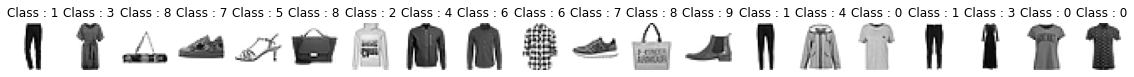

In [50]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [52]:
X_test = Test.values
X_test = X_test.reshape(-1,28, 28,1)

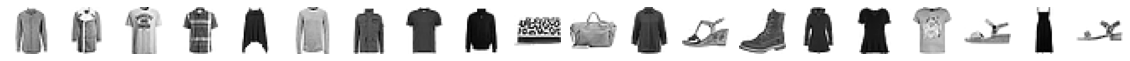

In [53]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

# 데이터 분리

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [74]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils import np_utils


x_train_after= X_train.astype('float32')
x_test1_after= X_val.astype('float32')
x_test2_after= X_test.astype('float32')

batch_size =64
#data augmentation : 실질적인 상황을 고려해 rotation은 가하지 않았다.(데이터 셋에 기울어진 형태가 없는 것으로 보인다.)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True )
# color_mode : rgb / class_mode = 'categorical'
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_dataset = datagen.flow(x_train_after, y_train, batch_size=batch_size)

In [75]:
test1_dataset = tf.data.Dataset.from_tensor_slices((x_test1_after, y_val))
test1_dataset = test1_dataset.batch(batch_size)

In [76]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.regularizers import l2

VGG 모델 구조를 참고하였다.

# model1

In [93]:
     model = Sequential([ 
        Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),                 
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        # GlobalAveragePooling2D(),
        Dropout(0.6),
         
        Dense(512),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        
        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),    

        Dense(10, activation='softmax'),

        
     ])


In [94]:
# model compile
from keras import optimizers
#'adam'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [95]:
# model 체크포인트 생성
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_sparse_categorical_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

In [96]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_48 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_49 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_49 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)       

In [98]:
#model fit
result = model.fit(train_dataset, epochs = 100,  callbacks=[cp_callback, earlystopping], validation_data=(test1_dataset))

Epoch 1/100
744/744 [==============================] - 52s 66ms/step - loss: 0.9094 - sparse_categorical_accuracy: 0.6592 - val_loss: 1.3700 - val_sparse_categorical_accuracy: 0.6345

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.63454, saving model to /content/checkpoint_entire_best.h5
Epoch 2/100
744/744 [==============================] - 49s 66ms/step - loss: 0.4804 - sparse_categorical_accuracy: 0.8345 - val_loss: 0.3941 - val_sparse_categorical_accuracy: 0.8542

Epoch 00002: val_sparse_categorical_accuracy improved from 0.63454 to 0.85420, saving model to /content/checkpoint_entire_best.h5
Epoch 3/100
744/744 [==============================] - 49s 65ms/step - loss: 0.4011 - sparse_categorical_accuracy: 0.8606 - val_loss: 0.4033 - val_sparse_categorical_accuracy: 0.8669

Epoch 00003: val_sparse_categorical_accuracy improved from 0.85420 to 0.86689, saving model to /content/checkpoint_entire_best.h5
Epoch 4/100
744/744 [==============================] - 49s 65

In [99]:
model = keras.models.load_model('/content/checkpoint_entire_best.h5')

In [100]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'my_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,3
2,2,0
3,3,0
4,4,0


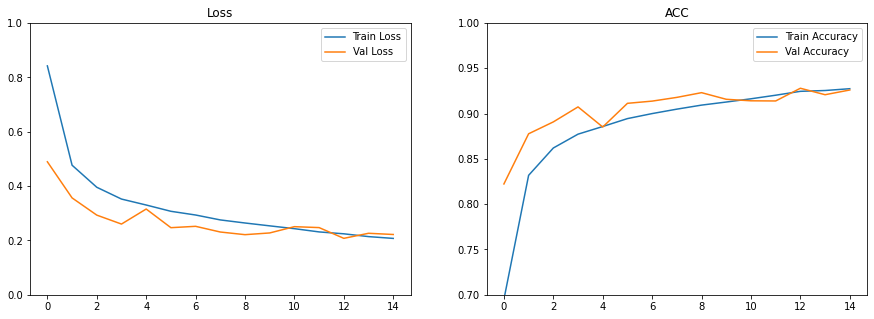

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['sparse_categorical_accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# model2

In [88]:
     model = Sequential([ 
tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10, activation='softmax')

        
     ])


In [90]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [91]:
result = model.fit(train_dataset, epochs = 15,  callbacks=[cp_callback, earlystopping], validation_data=(test1_dataset))

Epoch 1/15
744/744 [==============================] - 19s 25ms/step - loss: 0.8607 - sparse_categorical_accuracy: 0.6883 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.7934

Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.92798
Epoch 2/15
744/744 [==============================] - 19s 26ms/step - loss: 0.6136 - sparse_categorical_accuracy: 0.7763 - val_loss: 0.5020 - val_sparse_categorical_accuracy: 0.8197

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.92798
Epoch 3/15
744/744 [==============================] - 19s 26ms/step - loss: 0.5571 - sparse_categorical_accuracy: 0.7987 - val_loss: 0.4583 - val_sparse_categorical_accuracy: 0.8356

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92798
Epoch 4/15
744/744 [==============================] - 19s 25ms/step - loss: 0.5275 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.8346

Epoch 00004: val_sparse_categorical_accuracy d

모델의 깊이가 깊은 첫번째 모델이 더 좋은 성능을 보였다. model1의 epoch를 늘려서 제출할 것이다. 